In [ ]:
# Устанавливаем библиотеку для сбора списка установленных модулей.
!pip install session-info

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 1.8 MB/s 
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8048 sha256=4ab7088e61e70e29d49461c0eebf5b6c48904c5941890ebb189444fcb266f494
  Stored in directory: /root/.cache/pip/wheels/bd/ad/14/6a42359351a18337a8683854cfbba99dd782271f2d1767f87f
Successfully built session-info


In [ ]:
# Импорт модулей
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import cv2
from google.colab.patches import cv2_imshow
import session_info

In [ ]:
# Выведем версии используемых модулей.
session_info.show()

In [ ]:
# Подключение гугл диска
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Переходим в папку куда будем копировать данные с гитхаба
%cd drive/MyDrive/

# Копируем данные с гитхаба 
!git clone https://github.com/ultralytics/yolov5

# После копирования переходим в папку yolov5 и ставим список библиотек из файла
%cd yolov5
%pip install -qr requirements.txt

/content/drive/MyDrive
Cloning into 'yolov5'...
remote: Enumerating objects: 14566, done.
remote: Counting objects: 100% (136/136), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 14566 (delta 84), reused 116 (delta 71), pack-reused 14430
Receiving objects: 100% (14566/14566), 13.50 MiB | 9.46 MiB/s, done.
Resolving deltas: 100% (10061/10061), done.
/content/drive/MyDrive/yolov5
     |████████████████████████████████| 1.6 MB 5.2 MB/s 


In [ ]:
# Ставим библиотеку для визуализации обучения модели
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 5.0 MB/s 
     |████████████████████████████████| 182 kB 63.4 MB/s 
     |████████████████████████████████| 166 kB 68.8 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 166 kB 62.9 MB/s 
     |████████████████████████████████| 162 kB 69.1 MB/s 
     |████████████████████████████████| 162 kB 61.2 MB/s 
     |████████████████████████████████| 158 kB 67.3 MB/s 
     |████████████████████████████████| 157 kB 69.5 MB/s 
     |████████████████████████████████| 157 kB 70.5 MB/s 
     |████████████████████████████████| 157 kB 59.0 MB/s 
     |████████████████████████████████| 157 kB 70.6 MB/s 
     |████████████████████████████████| 157 kB 57.9 MB/s 
     |████████████████████████████████| 157 kB 68.1 MB/s 
     |████████████████████████████████| 157 kB 68.6 MB/s 
     |████████████████████████████

In [ ]:
# Импортируем установленную библиотеку для визуализации обучения модели
import wandb
wandb.login(anonymous='must')

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
%cd ../yolov5

/content/drive/MyDrive/yolov5


In [ ]:
# Задаём параметры обучения модели. Размер картинок 640 на 640 (такой размер фото в датасете).
# Батчсайз 10, количество эпох 10.
# Путь к yaml файлу где указано количество классов и пути к папкам с картинками
# Стартовые веса (маленькая/средняя/большая модель)

!python train.py --img 640\
--batch 10\
--epochs 10\
--data '../data.yaml'\
--weights yolov5x.pt

wandb: Currently logged in as: anony-moose-429799. Use `wandb login --relogin` to force relogin
train: weights=yolov5x.pt, cfg=, data=../data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=10, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-216-g6e544d5 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0

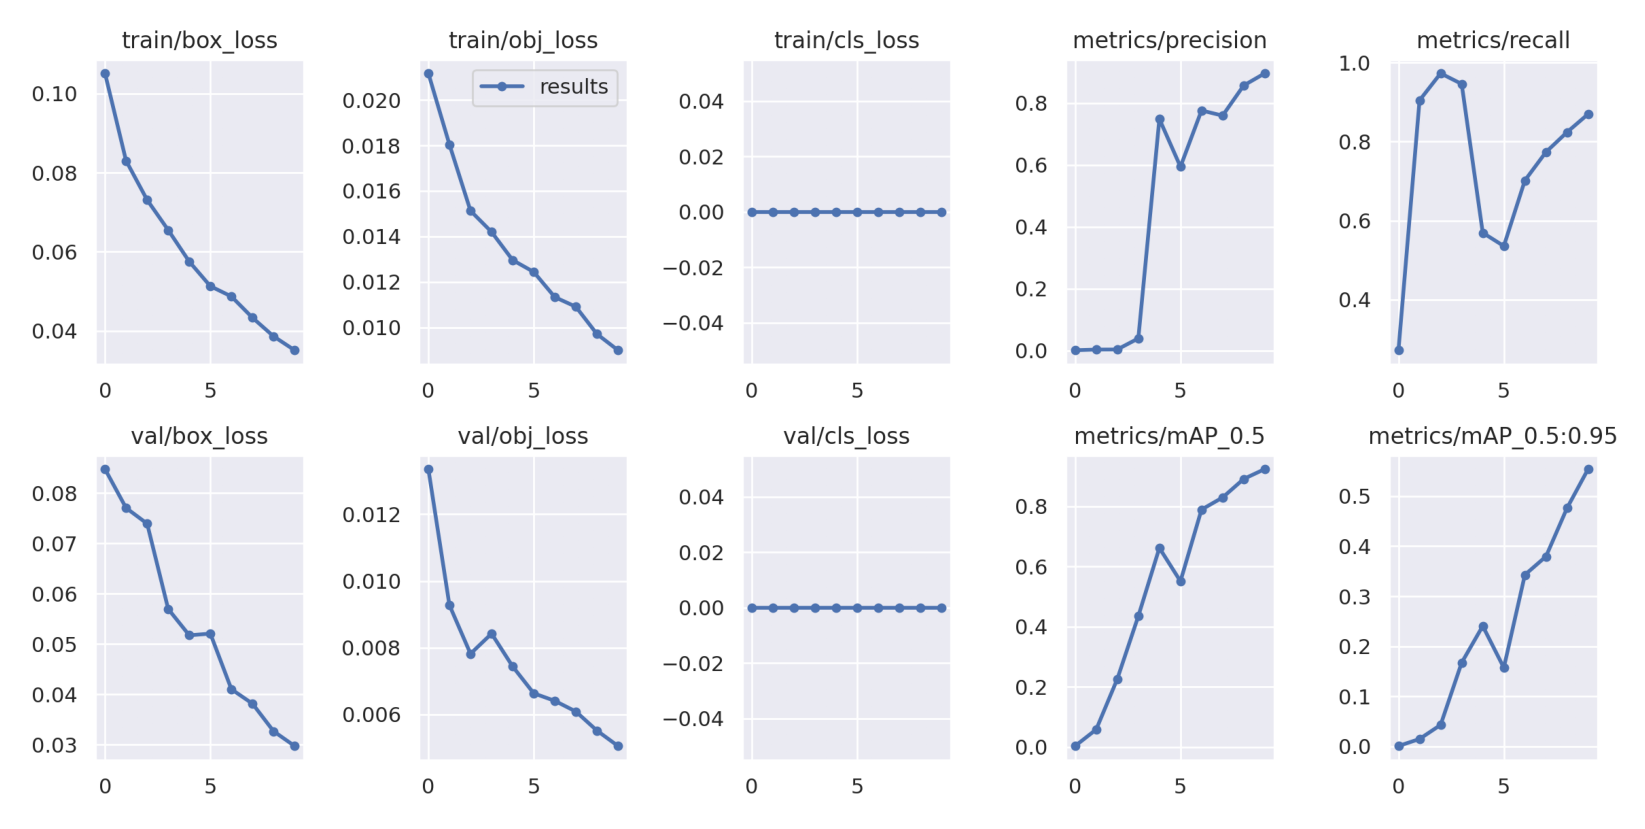

In [ ]:
# Выведем графики обучения модели на 10 эпохах (укажем путь к картинке в которую сохраняется результат)
plt.figure(figsize=(30,15))
plt.axis('off')
plt.imshow(plt.imread('../yolov5/runs/train/exp/results.png'))